<a href="https://colab.research.google.com/github/kazuma313/ArtificialIntelligence/blob/main/AIDeeper/ArtificialIntellegent/TensorFlow/NeuralNetwork%20/03_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network (CNN)
merupakan metode yang biasanya digunakan untuk memproses data gambar.
terdapat arisitektur yang membedakan dengan Neural network biasanya.
Berikut adalah komponen yang ada pada tradisional convolution neural network.

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*


In [ ]:
import datetime

In [ ]:
print(datetime.datetime.today())

2023-09-25 07:37:25.888766


In [ ]:
import zipfile
import os

In [ ]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-01-23 14:03:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.207, 142.250.148.207, 209.85.234.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   165MB/s    in 0.6s    

2024-01-23 14:03:27 (165 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


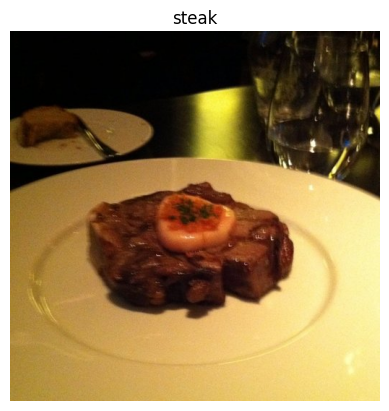

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# make the value of image range 0-1. why? it's because machine can work better using data with range 0-1
img[:5]/255.

array([[[0.00392157, 0.        , 0.        ],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01568627, 0.00784314],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.01568627, 0.01568627, 0.        ]],

       [[0.00392157, 0.        , 0.        ],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01176471, 0.01176471, 0.00392157],
        ...,
        [0.01568627, 0.01568627, 0.        ],
        [0.01568627, 0.01568627, 0.        ],
        [0.02352941, 0.02352941, 0.        ]],

       [[0.00392157, 0.        , 0.        ],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01176471, 0.01176471, 0.00392157],
        ...,
        [0.02745098, 0.01568627, 0.        ],
        [0.02745098, 0.01568627, 0.        ],
        [0.03529412, 0.02352941, 0.        ]],

       [[0.00784314, 0.00392157, 0.        ],
        [0.01176471, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.

## Build Model

## ImageGenerator
mesin akan bekerja dengan baik jika nilai yang diberikan berupa rentang 0-1. maka dari itu, dilakukan normalisasi seperti diatas. Tensorflow telah memberikan fasilitas untuk menormalisasikan data menggunakan **ImageDataGenerator**. Module ini memfasilitasi untuk tahap preprocessing seperti augmentasi.

## Binnary Classification
Mari coba untuk melakukan binnary classification dari dataset yang tersedia.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Image data generator berguna untuk melakukan preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_dir= "/content/pizza_steak/train"
test_dir=  "/content/pizza_steak/test"

# ambil data dari direktori dan bagi mereka kedalam beberapa batch
train_data= train_datagen.flow_from_directory(train_dir,
                                                     batch_size= 32, # jumlah gambar yang akan di proses
                                                     target_size= (224, 224), # rubah semua gambar kedalam format 224 x 224
                                                     class_mode= "binary", # masalah yang akan diselesaikan (klasifikasi binary)
                                                     seed= 42, # optional matric yang akan digunakan
                                                     )

valid_data= valid_datagen.flow_from_directory(test_dir,
                                                   batch_size= 32,
                                                   target_size= (224, 224),
                                                   class_mode= "binary",
                                                   seed= 42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### batch
data training dan data testing di bagi manjadi 32 batch. hal ini digunakan agar proses training dapat dilakukan lebih cepat.

### target size
melakukan training, data yang di gunakan harus dipastikan memiliki dimensi yang sama, begitu juga pada data testing. hal yang di input untuk dilakukan sebagai training, konfigurasinya harus sama.

### class mode
Terdapat beberapa macam class mode. salah satunya adalah binary class mode. binary class mode menunjukan akan dilakukan klasifikasi berupa biner (0 atau 1)

In [ ]:
model_cnn= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size= 3, # atau (3, 3)
                           activation= "relu",
                           input_shape= (224, 224, 3) # ini merupakan layer pertama
                           ),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size= 2, # atau (2, 2)
                              padding= "valid" # atau same, dengan menggunakan same, maka padding output akan sama seperti input
                              ), # Untuk menurunkan ukukran dimensi dari gambar yang di train.
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])


### CNN
CNN memiliki beberapa paramter:
* filters = menganalisa fitur yang dilaluai setiap kernel. semakin tinggi nilai filters, semakin tinggi kompleksitasnya.
* kernel_size = merupakan size kernel yang di proses pada setiap gambar nya
* padding = penambahan pixel pada garis luar gambar. sehingga garis luar tetap diteliti lebih baik.
* activation
* dan lain-lain

In [ ]:
model_cnn.compile(loss= "binary_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics= ["accuracy"])


history= model_cnn.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data), # menyesuakan pelatihan model dengan jumlah data pada setiap batch
                        validation_data= valid_data,
                        validation_steps= (len(valid_data))
                        )

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.6613 - accuracy: 0.6013 - val_loss: 0.4621 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.4374 - accuracy: 0.8073 - val_loss: 0.3791 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 63s 1s/step - loss: 0.4435 - accuracy: 0.8060 - val_loss: 0.3605 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 61s 1s/step - loss: 0.3781 - accuracy: 0.8407 - val_loss: 0.3258 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3776 - accuracy: 0.8367 - val_loss: 0.3538 - val_accuracy: 0.8360


In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_cnn_1_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size= 3,
                           activation= "relu",
                           input_shape= (224, 224, 3)
                           ),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size= 2,
                              padding= "valid"
                              ),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters=5,
                           kernel_size=(2, 2),
                           padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

In [ ]:
model_cnn_1_1.compile(loss= "binary_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics= ["accuracy"])


history= model_cnn_1_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= (len(valid_data)))

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.5922 - accuracy: 0.6880 - val_loss: 0.5206 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.4926 - accuracy: 0.7747 - val_loss: 0.4446 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4448 - accuracy: 0.8067 - val_loss: 0.3636 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 61s 1s/step - loss: 0.4073 - accuracy: 0.8120 - val_loss: 0.3274 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3716 - accuracy: 0.8387 - val_loss: 0.3297 - val_accuracy: 0.8760


Terdapat kasus dimana terjadi overfitting. proses menurunkan overfitting dinamakan dengan **regularisasi**. Hal ini biasa ditemukan disaat pelathian machine learing. Terdapat beberapa step untuk menangani overfitting. Nanti pasti bakalan ketemu kasus tersebut.

> Pada Deeplearning, dibutuhkan GPU agar melakukan pelatihan lebih cepat.

Mencoba dengan tanpa maxpooling2D. Fungsi maxpooling2D untuk mengecilkan fitur (featur extraction)

### Tanpa maxpooling2D

In [ ]:
input_shape= train_data.image_shape
input_shape

(224, 224, 3)

In [ ]:
model_cnn_2= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size= 3,
                           strides= 1,
                           padding= "valid",
                           activation= "relu",
                           input_shape= input_shape), # input layer
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid") # output layer
])

In [ ]:
model_cnn_2.compile(loss= tf.keras.losses.binary_crossentropy,
                    optimizer= tf.keras.optimizers.Adam(),
                    metrics= ["accuracy"])

In [ ]:
len(train_data), len(valid_data)

(47, 16)

In [ ]:
hisotry_2= model_cnn_2.fit(train_data,
                           epochs= 5,
                           steps_per_epoch= len(train_data), # untuk melakukan epoch pada setiap batch
                           validation_data= valid_data,
                           validation_steps= (len(valid_data)))

Epoch 1/5
47/47 [==============================] - 123s 3s/step - loss: 1.1853 - accuracy: 0.5093 - val_loss: 0.6829 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 120s 3s/step - loss: 0.6608 - accuracy: 0.5880 - val_loss: 0.6694 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 129s 3s/step - loss: 0.5824 - accuracy: 0.6807 - val_loss: 0.5809 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 128s 3s/step - loss: 0.4233 - accuracy: 0.8127 - val_loss: 0.4914 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 128s 3s/step - loss: 0.2952 - accuracy: 0.8953 - val_loss: 0.4537 - val_accuracy: 0.7820


proses trainingnya lebih lama dikaranakan tidak dilakukan feature extraction.

In [ ]:
hisotry_2.history

{'loss': [1.185268759727478,
  0.6608161330223083,
  0.5823853611946106,
  0.4232831597328186,
  0.29518118500709534],
 'accuracy': [0.5093333125114441,
  0.5879999995231628,
  0.6806666851043701,
  0.812666654586792,
  0.8953333497047424],
 'val_loss': [0.6828698515892029,
  0.6694274544715881,
  0.5808929800987244,
  0.491421103477478,
  0.4537389576435089],
 'val_accuracy': [0.5099999904632568,
  0.5879999995231628,
  0.7279999852180481,
  0.800000011920929,
  0.7820000052452087]}

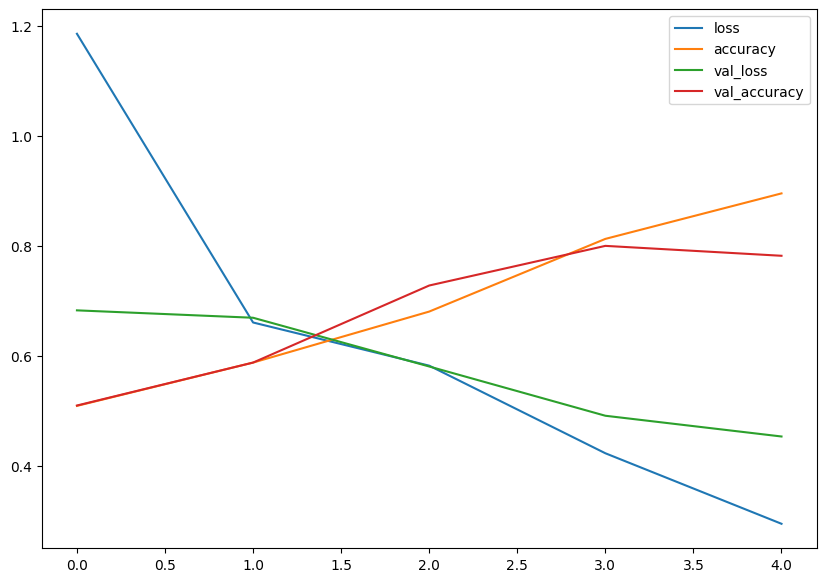

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(hisotry_2.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

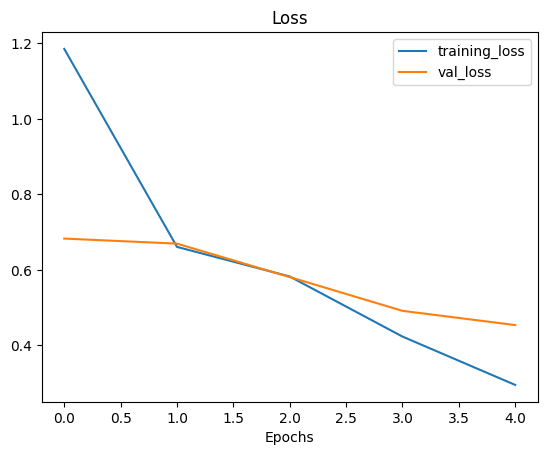

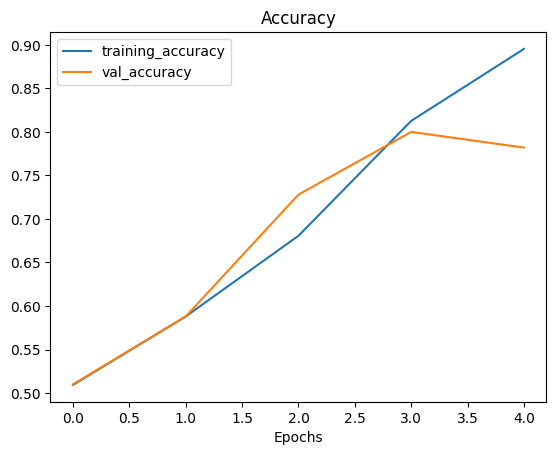

In [ ]:
plot_loss_curves(hisotry_2)

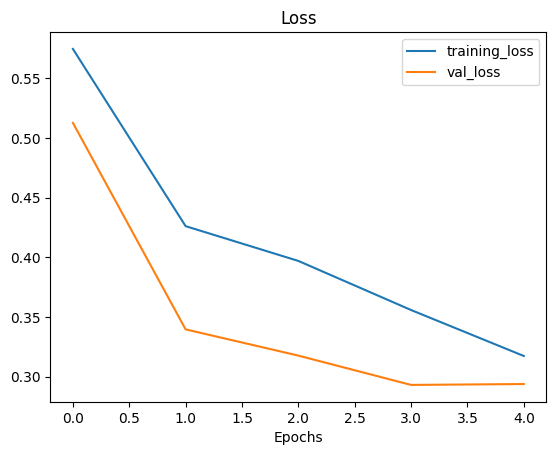

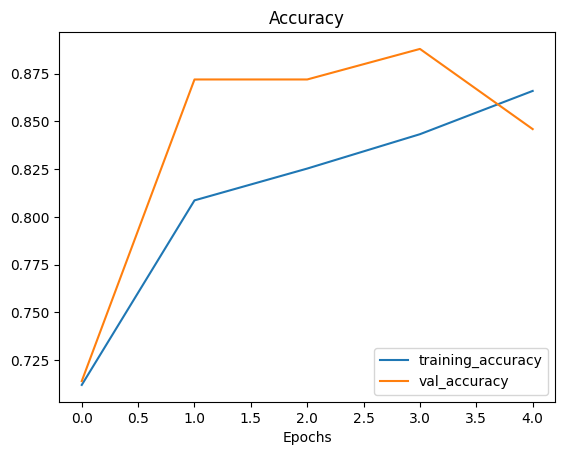

In [ ]:
plot_loss_curves(history)

val akurasi tanpa pooling lebih kecil.

### menggunakan augmentasi
augmentasi merupakan suatu metode pada preprocessing image untuk memodifikasi data seperti zoom, filp, kecerahan, dan lain-lain.

In [ ]:
tf.random.set_seed(42)

# Image data generator berguna untuk melakukan preprocessing

#augmentasi data
train_datagen_augmnetasi= ImageDataGenerator(rescale= 1./255,
                                             horizontal_flip= True,
                                             zoom_range= 0.3,
                                             rotation_range= 90,
                                             brightness_range= [0.1, 0.3],
                                             shear_range= 0.2)
# train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_dir= "/content/pizza_steak/train"
test_dir=  "/content/pizza_steak/test"

# ambil data dari direktori dan bagi mereka kedalam beberapa batch
train_data= train_datagen_augmnetasi.flow_from_directory(train_dir,
                                                     batch_size= 32, # jumlah gambar yang akan di proses
                                                     target_size= (224, 224), # rubah semua gambar kedalam format 224 x 224
                                                     class_mode= "binary", # masalah yang akan diselesaikan (klasifikasi binary)
                                                     seed= 42, # optional matric yang akan digunakan
                                                     )

valid_data= valid_datagen.flow_from_directory(test_dir,
                                                   batch_size= 32,
                                                   target_size= (224, 224),
                                                   class_mode= "binary",
                                                   seed= 42)


model_cnn_3= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size= 3, # atau (3, 3)
                           activation= "relu",
                           input_shape= (224, 224, 3) # ini merupakan layer pertama
                           ),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size= 2, # atau (2, 2)
                              padding= "valid" # atau same, dengan menggunakan same, maka padding output akan sama seperti input
                              ), # Untuk menurunkan ukukran dimensi dari gambar yang di train.
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.Conv2D(10, 3, activation= "relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

model_cnn_3.compile(loss= "binary_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics= ["accuracy"])


history_3= model_cnn_3.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data), # menyesuakan pelatihan model dengan jumlah data pada setiap batch
                        validation_data= valid_data,
                        validation_steps= (len(valid_data))
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 150s 3s/step - loss: 0.6308 - accuracy: 0.6600 - val_loss: 0.6216 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 126s 3s/step - loss: 0.5502 - accuracy: 0.7207 - val_loss: 0.9690 - val_accuracy: 0.6520
Epoch 3/5
47/47 [==============================] - 154s 3s/step - loss: 0.5299 - accuracy: 0.7500 - val_loss: 0.6549 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 124s 3s/step - loss: 0.5140 - accuracy: 0.7607 - val_loss: 0.9314 - val_accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 125s 3s/step - loss: 0.5045 - accuracy: 0.7580 - val_loss: 0.8028 - val_accuracy: 0.7720


menggunakan augmentasi data, akan mempengaruhi waktu training yang dilakukan. hal ini dikarenakan, terdapat proses tambahan yaitu augmentasi data sebelum dilakukan training. menggunakan augmentasi merupakan salah satu cara untuk mengatasi overfitting.

jangan lupa untuk melakukan shuffle untuk data training. hal ini dperlakukan agar setiap tahap training, data yang dihadapkan secara random.
training diatas tidak menggunakan shuffle untuk melakukan training, dikarenakan saya lupa. 👀

In [ ]:
images, label = train_data.next()

In [ ]:
import numpy as np


In [ ]:
len(label)

32

In [ ]:
np.sum(label)

15.0

<Figure size 640x480 with 0 Axes>

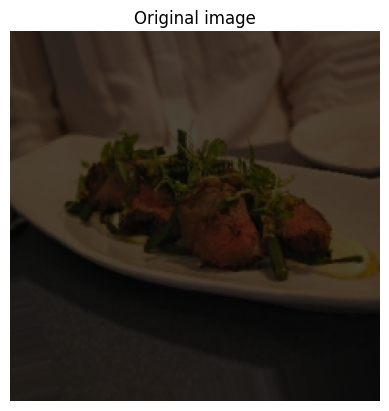

<Figure size 640x480 with 0 Axes>

In [ ]:

random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()


Hhhmm... sepertinya kecerahannya terlalu rendah. jadi, nanti seharusnya kecerahan pada augmentasinya dirubah.

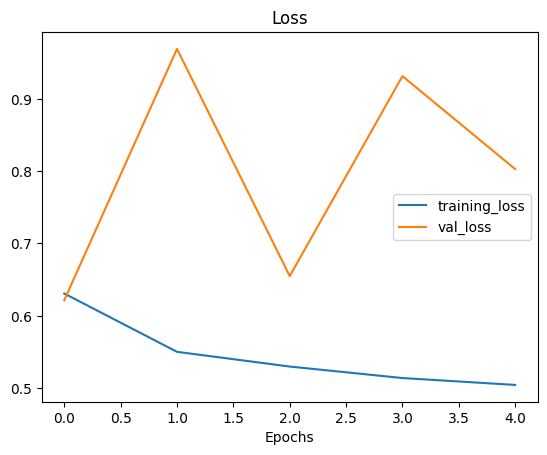

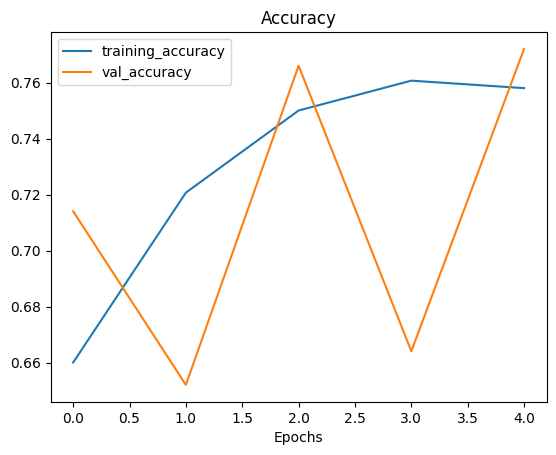

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_cnn_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

augmentasi sangat mempengaruhi dalam mencari akurasi. Perlu dilakukan experiment kembali terhadap parameter augmentasi.

untuk meng-handle overfitting selain overfitting juga disarankan melakukan shuffle pada saat training.

> 💻 Mencari hasil yang optimal pada machine learning, diperlukan eksperiment beberapa kali hingga puas dengan hasil yang didapat.

## Catagorical Classfication

Categorical classification merupakan klasifikasi yang mana label yang ingin di prediksi berjumlah lebih dari 2. Pada neural network, yang membedakan untuk kasus ini hanya pada loss nya pada inisilisasi compile model. loss yang digunakan adalah `categorical_crossentropy`.
juga pada image data generator diperlukan inisialisasi untuk class mode `categorical`.